<a id='home'></a>
### purpose 

create maps of populations that include the common gardens used

[1. jack pine](#jack)

- [get population data](#jackpop)

- [create map](#jackfig)

[2. Douglas-fir](#doug)

- [get population data](#dougpop)

- [create map](#dougfig)

In [1]:
from pythonimports import *
from myfigs import *

lview, dview = get_client()

latest_commit()
sinfo(html=True)

56 56
##################################################################
Current commit of pythonimports:
commit 51393d65f6b4f97bf9245fc37ae3c0a6cb41ca6b  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Mon Sep 12 14:32:41 2022 -0400
Today:	February 07, 2023 - 12:07:39
python version: 3.8.5
##################################################################



<a id='jack'></a>
# 1. jack pine

[top](#home)

<a id='jackpop'></a>
### get popdata

In [2]:
# population data
jppopdata = pd.read_table('/data/projects/pool_seq/environemental_data/jp_rm_p24/jp_no-p24_raw_env-19variables.txt')
jppopdata.index = jppopdata['our_id'].tolist()
jppopdata.head()

id1  id2   our_id      LAT      LONG  Elevation   AHM  CMD   DD5  \
JP_p98   9150251   38   JP_p98  54.3333 -106.6333        537  21.2  181  1273   
JP_p73      3273   22   JP_p73  44.4200  -84.6800        359  22.0  241  1956   
JP_p97   8060006   37   JP_p97  56.1167 -116.9167        636  23.5  242  1188   
JP_p60      3260   17   JP_p60  46.7200  -84.3900        203  16.5  135  1557   
JP_p100  9040116   40  JP_p100  55.7667  -97.8167        205  13.3  130  1003   

         DD_0   EMT   EXT  Eref  FFP  MAP  MAT  MCMT  MSP  MWMT  NFFD  PAS  \
JP_p98   2217 -46.0  34.7   534  103  461 -0.2 -20.1  305  16.6   149  129   
JP_p73    835 -34.1  36.6   745  131  732  6.1  -8.0  395  19.8   163  140   
JP_p97   2009 -44.3  34.8   556   90  432  0.2 -19.8  272  15.4   138  133   
JP_p60   1116 -36.8  34.3   599  123  848  4.0 -10.7  397  17.6   156  265   
JP_p100  2956 -49.7  35.2   448   82  506 -3.3 -24.9  315  15.7   106  191   

          SHM    TD  bFFP  eFFP group_color  
JP_p98   54.4  36.7   148   251       green  
JP_p73   50.0  27.8   141   271        blue  
JP_p97   56.5  35.1   151   241       green  
JP_p60   44.2  28.3   147   271        blue  
JP_p100  49.9  40.6   163   245       green

In [3]:
# common garden data
jpdir = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/phenotypes'
jpclim = pd.read_table(
    op.join(jpdir,
            'jack_pine_common_gardens_average_climate_1966-2018.txt'),
    index_col=0
).loc[['christine', 'fontbrune']]

jpclim

Latitude  Longitude  Elevation        AHM         CMD  \
christine  46.818749 -71.887803        156  12.179245   77.132075   
fontbrune  46.959018 -75.698440        247  13.962264  135.018868   

                   DD5         DD_0   EMT   EXT        Eref         FFP  \
christine  1739.150943  1281.716981 -38.9  43.6  621.962264  127.056604   
fontbrune  1624.962264  1418.849057 -41.1  42.6  646.849057  116.056604   

                   MAP       MAT       MCMT         MSP       MWMT  \
christine  1162.169811  3.998113 -13.845283  561.150943  18.962264   
fontbrune   953.754717  3.237736 -15.224528  475.490566  18.154717   

                 NFFD         PAS        SHM         TD        bFFP  \
christine  157.113208  358.075472  34.554717  32.811321  141.094340   
fontbrune  144.320755  298.849057  38.800000  33.377358  147.358491   

                 eFFP  
christine  268.169811  
fontbrune  263.471698

In [4]:
# common garden data to determine which pops were found in garden

jpphenodir = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/phenotypes'
jpfiles = fs(jpphenodir, 'cg-data_provpops')

phenos = ['Mortality_2018', 'Mean_Height_2018', 'Mean_DBH2018']

jpdata = {}
for f in jpfiles:
    garden = f.split("_")[-1].rstrip('.txt')
    if garden == 'petawawa':
        continue
    if garden == 'st-christine':
        garden = 'christine'  # match name in `cgdata.index`
    jpdata[garden] = pd.read_table(f)
    jpdata[garden].index = jpdata[garden]['our_id'].tolist()
    jpdata[garden] = jpdata[garden][phenos]
    print(garden, nrow(jpdata[garden]))

jpdata[garden].head()

fontbrune 27
christine 28


Mortality_2018  Mean_Height_2018  Mean_DBH2018
JP_p4             70.0           1799.09        228.00
JP_p6             64.0           1856.67        239.60
JP_p8             58.0           1988.95        259.63
JP_p14            72.0           1636.67        211.83
JP_p20            88.0           1578.33        218.50

In [5]:
# which provenance is in ste christine but not fontbrune
set(jpdata['christine'].index) - set(jpdata['fontbrune'].index)

{'JP_p62'}

In [6]:
# make sure all fontbrune are in christine
set(jpdata['fontbrune'].index) - set(jpdata['christine'].index)

set()

<a id='jackfig'></a>
### make fig and highlight which pops went into training / present in each garden

black edge = in both common gardens

yellow edge = in ste-christine but not fontbrune

white edge = in training data only

[top](#home)

Saved to:  /data/projects/pool_seq/phenotypic_data/jack_pine_with_gardens.pdf


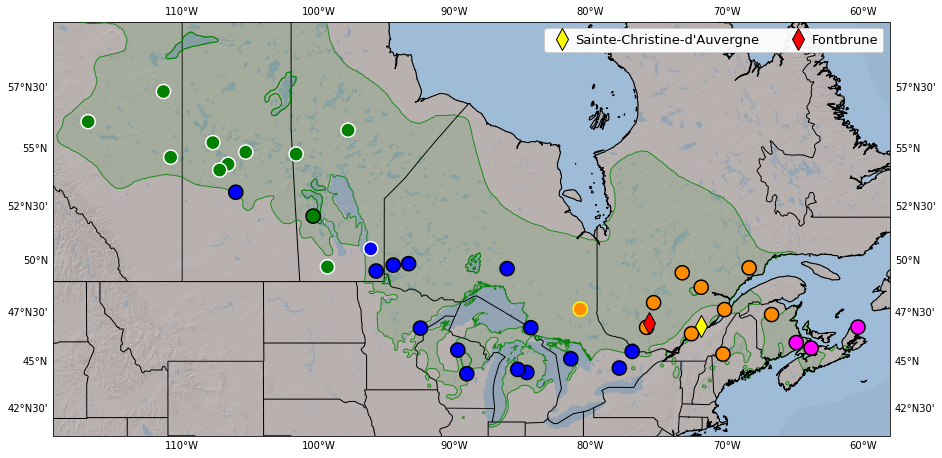

In [7]:
# everything I ever wanted <3

extent=[-119.5, -58, 41, 60]
figsize=(15,10)
shapefiles=[('green', '/data/projects/pool_seq/environemental_data/shapefiles/jackpine.shp')]

ax = basemap(extent=extent, figsize=figsize, shapefiles=shapefiles)
for pop in jppopdata.index:
    edgecolor = 'k' if pop in jpdata['fontbrune'].index.tolist() else 'yellow' if pop=='JP_p62' else 'white'
    color,lat,long = jppopdata[['group_color', 'LAT', 'LONG']].loc[pop]
    draw_pie_marker([1,0], long, lat, 200, colors=[color], ax=ax, transform=True, edgecolors=edgecolor)
    
# add common garden
for garden, color in zip(jpclim.index, ['yellow', 'red']):
    lat,long = jpclim[['Latitude', 'Longitude']].loc[garden]
    
    garden_name = garden.capitalize() if garden != 'christine' else "Sainte-Christine-d'Auvergne"
    plt.plot(long, lat, marker='d', transform=ccrs.PlateCarree(), zorder=5000, linestyle="None",
             markeredgecolor='k', markersize=15, markerfacecolor=color, label=garden_name)

plt.legend(ncol=2, framealpha=0.95, fontsize=13, handletextpad=0.01)

save_pdf('/data/projects/pool_seq/phenotypic_data/jack_pine_with_gardens.pdf')
plt.show()

<a id='doug'></a>
# Douglas-fir

[top](#home)

<a id='dougpop'></a>
### get pop data

In [8]:
# doug-fir vancouver common garden data
vanfile = '/data/projects/pool_seq/environemental_data/vancouver_data/vancouver_climate-2018-2019_USING.txt'
vanclim = pd.read_table(vanfile, index_col=0)
vanclim = vanclim[vanclim.index =='two_year_avg']
vanclim.index = ['vancouver']
vanclim.columns.values[:2] = ['Latitude', 'Longitude']
vanclim

Latitude  Longitude  Elevation    AHM    CMD     DD5  DD_0   EMT  \
vancouver    49.257    -123.25       81.0  18.05  301.0  2487.5  86.5 -13.5   

            EXT   Eref    FFP     MAP   MAT  MCMT    MSP   MWMT   NFFD   PAS  \
vancouver  35.0  648.0  262.0  1194.0  11.2   5.4  259.0  19.65  320.5  36.0   

             SHM     TD  bFFP   eFFP  
vancouver  76.65  14.25  60.0  322.0

In [9]:
# genetic group colors
dfdf = pd.read_table('/data/projects/pool_seq/environemental_data/change_p6/doug-fir_colored_pops.txt')
dfdf.loc[dfdf['our_id']=='DF_p40', ['group', 'group_color']] = 'North BC', '#f205f4'
dfcolors = dict(zip(dfdf['our_id'], dfdf['group_color']))

In [10]:
# population data
dfdata = pd.read_table('/data/projects/pool_seq/environemental_data/change_p6/df_ALL-naturalpops_raw_env-19variables_change-p6.txt')
dfdata['color'] = dfdata['our_id'].map(dfcolors)
dfdata.index = dfdata['our_id'].tolist()

# map prov to our id
provdict = dict(zip(dfdata['prov'], dfdata['our_id']))
print(len(provdict))

dfdata.head()

73


prov our_id Variety    LONG    LAT  Elevation  MAT  MWMT  MCMT    TD  \
DF_p1     1  DF_p1     FDC -126.63  49.78        225  8.4  15.6   2.3  13.3   
DF_p2     2  DF_p2     FDC -122.73  50.32        550  6.1  16.4  -4.4  20.8   
DF_p3     3  DF_p3     FDI -115.62  50.54       1525  1.6  13.4 -10.7  24.1   
DF_p4     4  DF_p4     FDI -122.33  52.04        900  3.9  15.3  -9.2  24.5   
DF_p5     5  DF_p5     FDI -119.05  49.02        853  6.0  17.7  -6.2  23.9   

        MAP  MSP   AHM    SHM  DD_0   DD5  NFFD  bFFP  eFFP  FFP  PAS   EMT  \
DF_p1  4004  778   4.6   20.0   143  1644   277   115   301  186  242 -18.3   
DF_p2  1029  225  15.6   73.0   518  1521   202   135   272  137  330 -30.9   
DF_p3   630  321  18.5   41.8  1242   929   130   171   244   73  261 -43.3   
DF_p4   423  196  32.9   78.2   919  1270   158   154   255  101  149 -40.2   
DF_p5   367  171  43.8  103.6   637  1650   182   142   265  123  100 -34.8   

        EXT  Eref  CMD    color  
DF_p1  33.3   606   10  #a6cee3  
DF_p2  35.2   659  307  #33a02c  
DF_p3  32.6   548  151  #22ff00  
DF_p4  34.9   598  350  #f205f4  
DF_p5  37.7   732  497  #995bbe

In [11]:
# pops used in common garden
phenodata = pd.read_table('/data/projects/pool_seq/phenotypic_data/doug-fir/Data_Totem_Blups_April_26_2021_Brandon-BLUPs_prov.txt')
phenodata.index = phenodata['Prov'].map(provdict).tolist()
nrow(phenodata)

73

In [12]:
len(set(phenodata.index).intersection(dfcolors.keys()))

73

<a id='dougfig'></a>
### make fig

[top](#home)

Saved to:  /data/projects/pool_seq/phenotypic_data/doug-fir_with_gardens.pdf


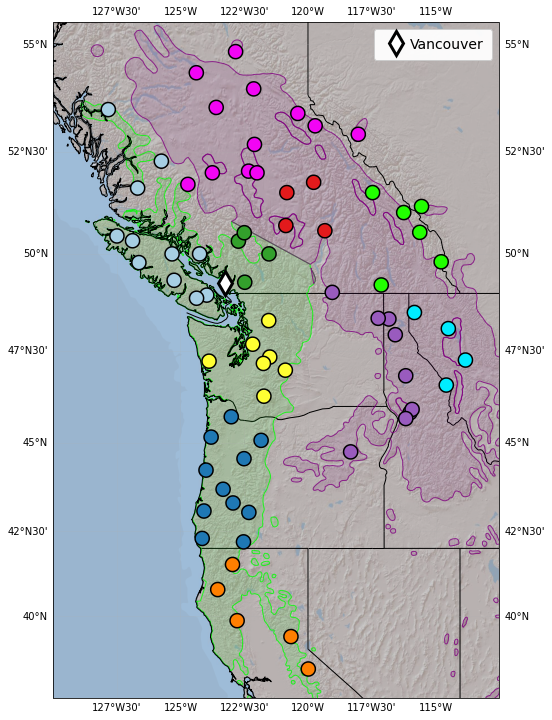

In [13]:
# everything I ever wanted <3
coastrange = '/data/projects/pool_seq/environemental_data/shapefiles/Coastal_DF.shp'
intrange = '/data/projects/pool_seq/environemental_data/shapefiles/Interior_DF.shp'

df_shapefiles = zip(['lime', 'purple'], [coastrange, intrange])

extent=[-130, -112.5, 37.5, 55.5]

ax = basemap(extent=extent, shapefiles=df_shapefiles)
for pop in dfdata.index:
    lat,long,color = dfdata[['LAT', 'LONG', 'color']].loc[pop]
    draw_pie_marker([1,0], long, lat, 200, colors=[color], ax=ax, transform=True)

# add common garden
for garden,color in zip(vanclim.index, ['white']):
    lat,long = vanclim[['Latitude', 'Longitude']].loc[garden]
    
    garden_name = garden.capitalize()
    plt.plot(long, lat, marker='d', transform=ccrs.PlateCarree(), zorder=5000, linestyle="None",
             markeredgecolor='k', markersize=17, markerfacecolor=color, label=garden_name, markeredgewidth=3)

plt.legend(framealpha=0.95, fontsize=14, handletextpad=0.01, borderpad=0.6)

save_pdf('/data/projects/pool_seq/phenotypic_data/doug-fir_with_gardens.pdf')
plt.show()

# create maps showing how data was trained for doug-fir

for talks

In [14]:
files = fs('/data/projects/pool_seq/environemental_data/shapefiles',
           'union',
           endswith='.shp',
           exclude=['EUprovs', 'jp', 'wl'])

files.extend(
    fs('/data/projects/pool_seq/environemental_data/shapefiles/combined',
       'union',
       endswith='.shp',
       exclude=['EUprovs', 'jp', 'wl']
      )
)

files

['/data/projects/pool_seq/environemental_data/shapefiles/coastal_union_file.shp',
 '/data/projects/pool_seq/environemental_data/shapefiles/interior_union_file.shp',
 '/data/projects/pool_seq/environemental_data/shapefiles/combined/df_combined_union_file.shp']

Saved to:  /data/projects/pool_seq/phenotypic_data/coastal_union_file.pdf


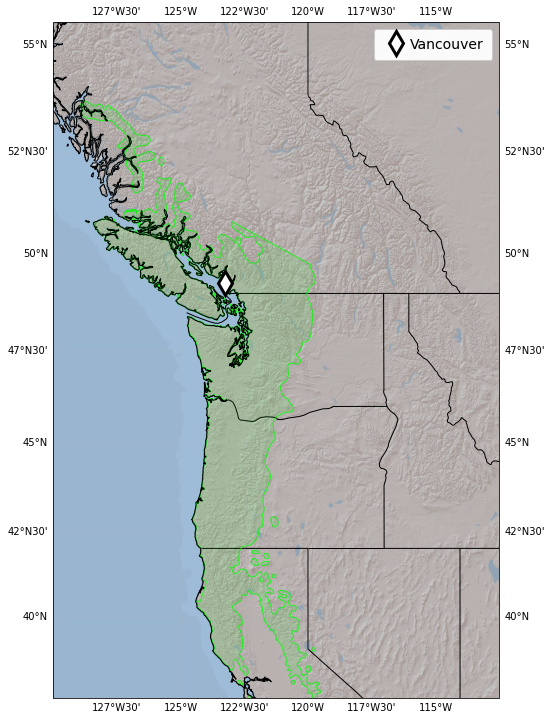

Saved to:  /data/projects/pool_seq/phenotypic_data/interior_union_file.pdf


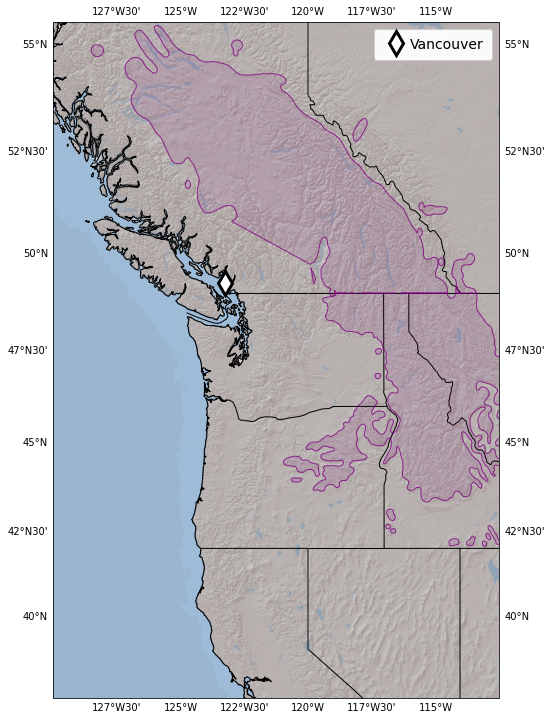

Saved to:  /data/projects/pool_seq/phenotypic_data/df_combined_union_file.pdf


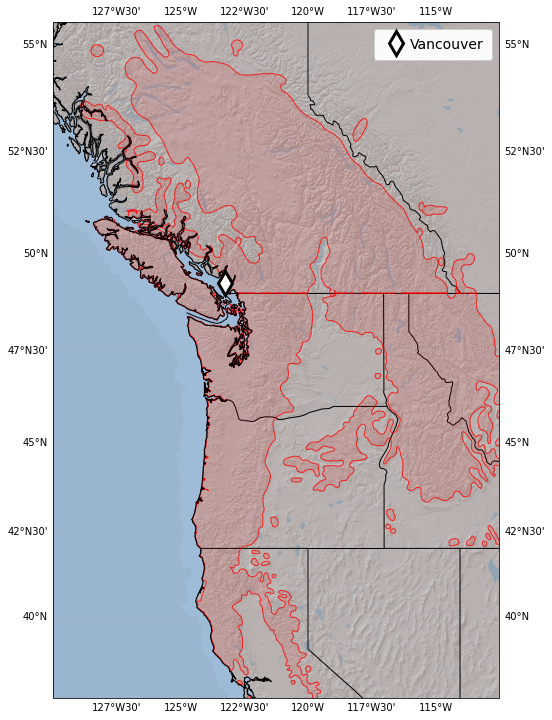

In [15]:
savedir = '/data/projects/pool_seq/phenotypic_data'
extent = [-130, -112.5, 37.5, 55.5]

for color,shp in zip(['lime', 'purple', 'red'], files):
    basemap(extent=extent, shapefiles=[(color, shp)])
    
    # add common garden
    for garden,color in zip(vanclim.index, ['white']):
        lat,long = vanclim[['Latitude', 'Longitude']].loc[garden]

        # add common garden
        garden_name = garden.capitalize()
        plt.plot(long, lat, marker='d', transform=ccrs.PlateCarree(), zorder=5000, linestyle="None",
                 markeredgecolor='k', markersize=17, markerfacecolor=color, label=garden_name, markeredgewidth=3,)
        
    plt.legend(framealpha=0.95, fontsize=14, handletextpad=0.01, borderpad=0.6)

    save_pdf(op.join(savedir, op.basename(shp.replace('.shp','.pdf'))))
    
    plt.show()

Saved to:  /data/projects/pool_seq/phenotypic_data/both_varieties_union_file.pdf


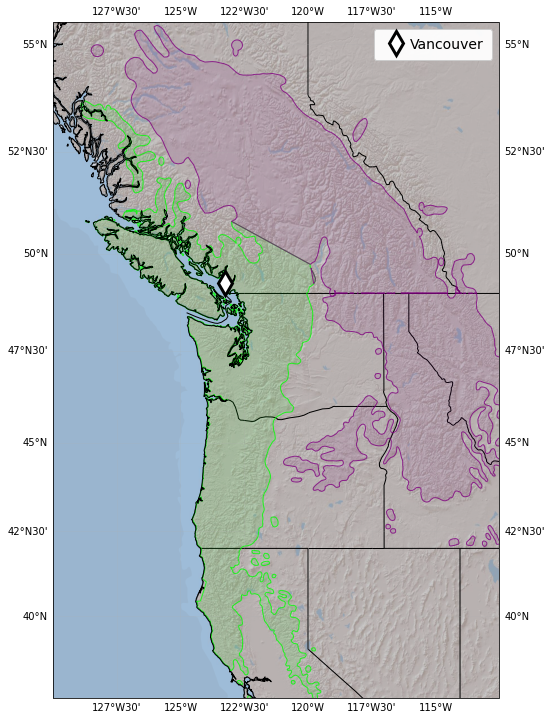

In [16]:
ax = basemap(extent=extent, shapefiles=[('lime', files[0]), ('purple', files[1])])

# add common garden
for garden,color in zip(vanclim.index, ['white']):
    lat,long = vanclim[['Latitude', 'Longitude']].loc[garden]

    # add common garden
    garden_name = garden.capitalize()
    plt.plot(long, lat, marker='d', transform=ccrs.PlateCarree(), zorder=5000, linestyle="None",
             markeredgecolor='k', markersize=17, markerfacecolor=color, label=garden_name, markeredgewidth=3,)

    plt.legend(framealpha=0.95, fontsize=14, handletextpad=0.01, borderpad=0.6)
    
save_pdf(op.join(savedir, 'both_varieties_union_file.pdf'))

Saved to:  /data/projects/pool_seq/phenotypic_data/jack_pine.pdf


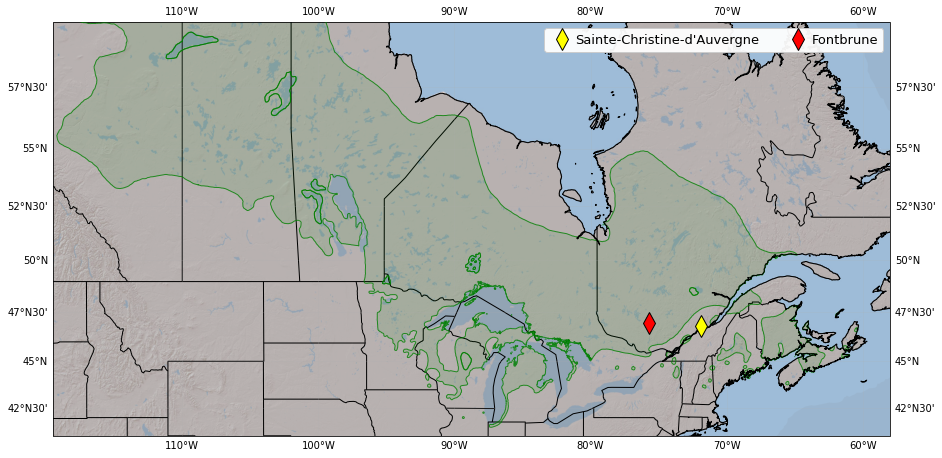

In [17]:
ax = basemap(extent=[-119.5, -58, 41, 60], figsize=(15,10), shapefiles=[('green', '/data/projects/pool_seq/environemental_data/shapefiles/jackpine.shp')])

# add common garden
for garden,color in zip(jpclim.index, ['yellow', 'red']):
    lat,long = jpclim[['Latitude', 'Longitude']].loc[garden]
    
    garden_name = garden.capitalize() if garden != 'christine' else "Sainte-Christine-d'Auvergne"
    plt.plot(long, lat, marker='d', transform=ccrs.PlateCarree(), zorder=5000, linestyle="None",
             markeredgecolor='k', markersize=15, markerfacecolor=color, label=garden_name)

plt.legend(ncol=2, framealpha=0.95, fontsize=13, handletextpad=0.01)
save_pdf(op.join(savedir, 'jack_pine.pdf'))

Saved to:  /data/projects/pool_seq/phenotypic_data/jack_pine_christine.pdf


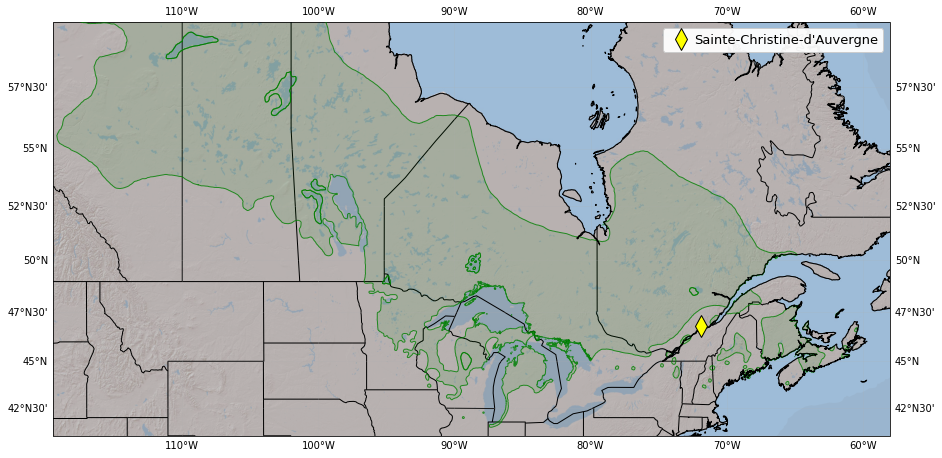

Saved to:  /data/projects/pool_seq/phenotypic_data/jack_pine_fontbrune.pdf


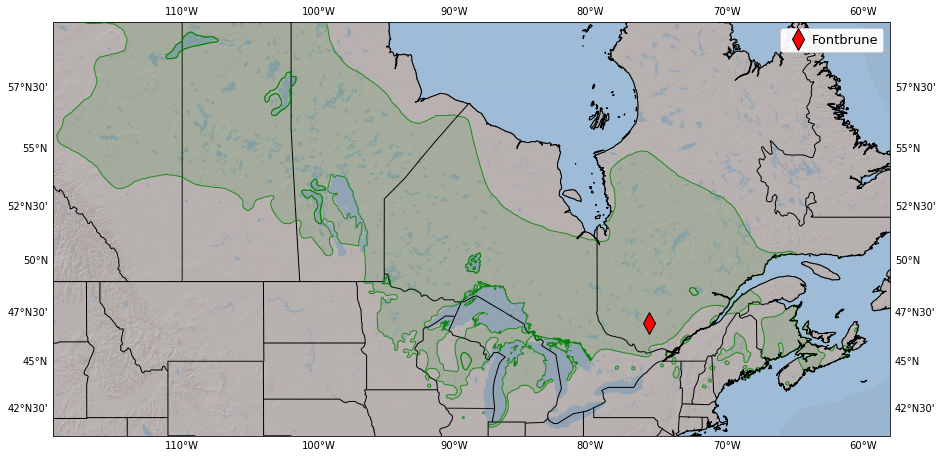

In [18]:
# add common garden
for garden,color in zip(jpclim.index, ['yellow', 'red']):
    ax = basemap(extent=[-119.5, -58, 41, 60],
                 figsize=(15,10),
                 shapefiles=[('green', '/data/projects/pool_seq/environemental_data/shapefiles/jackpine.shp')])
    
    lat,long = jpclim[['Latitude', 'Longitude']].loc[garden]
    
    garden_name = garden.capitalize() if garden != 'christine' else "Sainte-Christine-d'Auvergne"
    plt.plot(long, lat, marker='d', transform=ccrs.PlateCarree(), zorder=5000, linestyle="None",
             markeredgecolor='k', markersize=15, markerfacecolor=color, label=garden_name)

    plt.legend(ncol=2, framealpha=0.95, fontsize=13, handletextpad=0.01)
    save_pdf(op.join(savedir, f'jack_pine_{garden}.pdf'))
    plt.show()

[top](#home)